# Indian Liver Patient

# PRE-PROCESSING DATA 

Tujuan dari klasifikasi ini adalah untuk membagi pasien yang mengidap Liver dan pasien yang tidak mengidap liver atau non liver yang dikumpulkan pada daerah Timur Utara Andra Pradesh, India. Dataset ini terdiri dari 441 pasien pria dan 142 pasien wanita dengan total pasien berjumlah 583.  

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.preprocessing import LabelEncoder as le
import pandas as pd
from sklearn.metrics import confusion_matrix

In [23]:
data = pd.read_csv ("L:/indian_liver_patient_dataset.csv",sep=';')

In [24]:
data

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0
5,46,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,0
6,26,0,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,0
7,29,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,0
8,17,1,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,1
9,55,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,0


# Set data dan Target

In [25]:
df=data.values
X = df[:,0:10]
Y = df [:, 10]

# Features Scaling

Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama.

In [12]:
scaler = MinMaxScaler()
X = scaler.fit_transform(features)

# Spliting

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)

In [14]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 10, activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

# Dibawah ini merupakan proses training dan testing data

In [15]:
acc_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=100)

Train on 408 samples, validate on 175 samples
Epoch 1/100
408/408 [==============================] - 1s 1ms/step - loss: 0.5962 - acc: 0.7181 - val_loss: 0.5923 - val_acc: 0.7143
Epoch 2/100
408/408 [==============================] - 0s 175us/step - loss: 0.5650 - acc: 0.6985 - val_loss: 0.5578 - val_acc: 0.7086
Epoch 3/100
408/408 [==============================] - 0s 162us/step - loss: 0.5397 - acc: 0.7132 - val_loss: 0.5179 - val_acc: 0.7143
Epoch 4/100
408/408 [==============================] - 0s 163us/step - loss: 0.5197 - acc: 0.7132 - val_loss: 0.5297 - val_acc: 0.7143
Epoch 5/100
408/408 [==============================] - 0s 220us/step - loss: 0.5324 - acc: 0.7132 - val_loss: 0.5118 - val_acc: 0.7200
Epoch 6/100
408/408 [==============================] - 0s 138us/step - loss: 0.5218 - acc: 0.7059 - val_loss: 0.5250 - val_acc: 0.7143
Epoch 7/100
408/408 [==============================] - 0s 159us/step - loss: 0.5267 - acc: 0.7108 - val_loss: 0.5069 - val_acc: 0.7143
Epoch 8/100

Epoch 61/100
408/408 [==============================] - 0s 138us/step - loss: 0.4732 - acc: 0.7304 - val_loss: 0.5519 - val_acc: 0.7086
Epoch 62/100
408/408 [==============================] - 0s 132us/step - loss: 0.4868 - acc: 0.7255 - val_loss: 0.4957 - val_acc: 0.7143
Epoch 63/100
408/408 [==============================] - 0s 147us/step - loss: 0.4774 - acc: 0.7353 - val_loss: 0.5078 - val_acc: 0.7029
Epoch 64/100
408/408 [==============================] - 0s 157us/step - loss: 0.4802 - acc: 0.7451 - val_loss: 0.5030 - val_acc: 0.7086
Epoch 65/100
408/408 [==============================] - 0s 172us/step - loss: 0.4709 - acc: 0.7402 - val_loss: 0.4847 - val_acc: 0.7371
Epoch 66/100
408/408 [==============================] - 0s 195us/step - loss: 0.4902 - acc: 0.6985 - val_loss: 0.4980 - val_acc: 0.7257
Epoch 67/100
408/408 [==============================] - 0s 170us/step - loss: 0.4755 - acc: 0.7451 - val_loss: 0.4967 - val_acc: 0.7200
Epoch 68/100
408/408 [==========================

In [16]:
acc_testing  = model.evaluate(X_test, Y_test) 
acc_testing

175/175 [==============================] - 0s 96us/step


[0.5048669007846287, 0.7028571445601327]

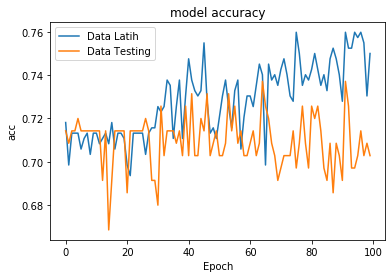

In [17]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

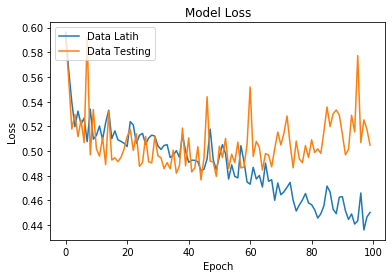

In [18]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

In [19]:
prediction = model.predict_classes(X_test)

In [20]:
cm = confusion_matrix(Y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[114  11]
 [ 41   9]]


In [21]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.912
recall :  0.7354838709677419
F1 :  0.8142857142857143
sensitivity :  0.7354838709677419
akurasi :  0.7028571428571428
